# Import libraries

In [1]:
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data/ts_transcription')
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.rcParams['date.epoch'] = '0000-12-31'
import math

# Introduction to date and time
## Importing time series data

- pd.read_csv시 사용하는 인자
    * index_col : 로드할 때 인덱스로 설정할 칼럼
    * parse_dates : 해당칼럼을 날짜 형태로 자동으로 parsing해줌

In [2]:
google = pd.read_csv('./GOOGL_2006-01-01_to_2018-01-01.csv',
                    index_col='Date',
                    parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [3]:
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [4]:
humidity = pd.read_csv("./humidity.csv",
                      index_col='datetime',
                      parse_dates=['datetime'])
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


## Cleaning preparing time series data

- 결측치 처리 방법
    * fillna(method='ffill' or 'pad'): 결측치를 기준으로 앞에있는 값을 갖고와서 대체
    * fillna(method='bfill' or 'backfill'): 결측치를 기준으로 뒤에있는 값을 갖고와서 대체
<br><br>
- 결측치 채울 때 채울 개수 제한하는 방법
    * fillna(method='ffill', limit=2): 결측치를 기준으로 앞에있는 값을 갖고와서 (행 순서를 기준으로) 결측치들 중 위에서 2개의 결측치만을 대체
<br><br>
- 결측치를 ``변수별`` 평균값으로 대체하는 방법
    * df.fillna(df.mean())
    * df.where(pd.notnull(df), df.mean(), axis='columns')
    * df.fillna(df.mean()['C1':'C2']: 칼럼 C1, C2의 각 평균값을 C1, C2의 결측치들을 대체값으로 선정(단, 다른 칼럼 C3, C4..의 결측치는 그대로 있음)
<br><br>
- **결측치를 다른 변수의 값으로 대체하는 방법(for 문보다 훨씬더 빠름!)**
    * np.where(pd.notnull(df['C1'])== True, df['C2'], df['C1'])
        - 이 때, df['C2'] 결측치는 행 기준으로 똑같은 행에 있는 df['C1']값으로 대체함!

In [5]:
# 가장 맨 처음 행은 모두 결측치값이므로 제외하고 재할당
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


## Visualizing the time-series datasets

<AxesSubplot:xlabel='datetime'>

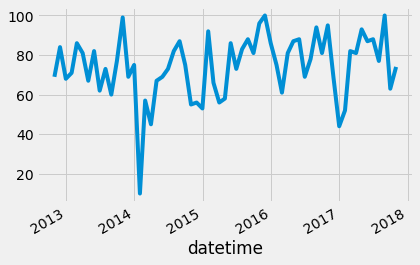

In [6]:
humidity['Kansas City'].asfreq('M').plot()

- ``plt.savefig('파일이름')``으로 그래프 저장 가능! =>캡쳐하지말고 이렇게 하자!

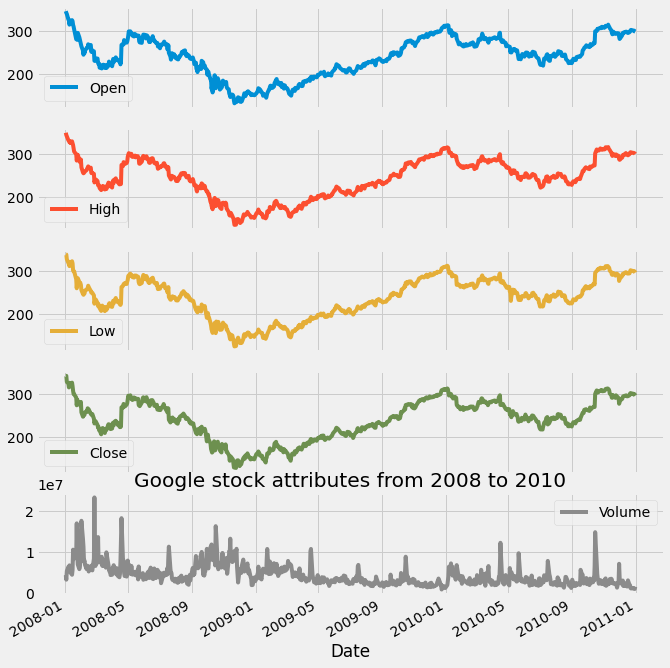

In [7]:
# datetime이 인덱스일 때 다음과 같이 날짜 기간 설정해서 불러올 수 있음!
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title("Google stock attributes from 2008 to 2010")
plt.savefig('/Users/younghun/Desktop/google_stocks.png')
plt.show()

## Timestamps and Periods

- pd.Timestamp(year, month, day, hour)로 특정 시간대 설정 가능
- pd.Period('연도-월-일') => 'D'ay로 설정됨
- pd.Period('연도-월') => 'M'onth로 설정됨

In [8]:
timestamp = pd.Timestamp(2020, 10, 21, 13)
timestamp

Timestamp('2020-10-21 13:00:00')

In [9]:
period_day = pd.Period('2020-11-15')
period_day

Period('2020-11-15', 'D')

In [10]:
period_month = pd.Period('2020-11')
period_month

Period('2020-11', 'M')

- 설정한 period 시작,끝 사이에 지정한 timestamp가 있는지 대소비교(<,> 등)을 통해 boolean으로 반환 가능
    * 'D'로 설정했으면 그 날 오전 00시 ~ 오후 23시 59분까지
    * 'M'로 설정했으면 그 달 1일 오전00시 ~ 그달 30(31)일 23시 59분까지

In [11]:
period_day.start_time < timestamp < period_day.end_time

False

- timestamp를 period로 convert하기
    * period로 전환할 때 freq(주기성)값으로 설정 가능
- period를 timestamp로 convert하기
    * timestamp로 전환할 때 freq, how(시작점 or 끝점) 설정 가능

In [12]:
new_period = timestamp.to_period(freq='H') # 1시간 단위로 기간 설정!
new_period

Period('2020-10-21 13:00', 'H')

In [13]:
new_timestamp = period_day.to_timestamp(freq='H', how='end') # 1시간 단위로 바꾸고 끝 시간대를 설정
new_timestamp

Timestamp('2020-11-15 23:59:59.999999999')

## Using date_range

- pd.date_range(start, end, freq, periods)
    * default of 'freq' : Day
    * 날짜 format을 ``'month/day/year'``식으로 적어도 알아서 변환함
    * periods : 지정한 날짜 (부터 또는 까지) 그 만큼의 (day or month or year)추출

In [14]:
dr1 = pd.date_range(start='1/1/20', end='2/10/20')
dr1

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10'],
              dtype='datetime64[ns]', freq='D')

In [15]:
dr2 = pd.date_range(start='1/1/20', end='12/25/20', freq='M')
dr2

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', freq='M')

In [16]:
dr3 = pd.date_range(end='12/31/20', freq='M', periods=10)
dr3

DatetimeIndex(['2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [17]:
# 시작, 끝 날짜와 periods를 정해서 정한 날짜 범위를 periods 만큼 쪼갠 날짜 출력
dr4 = pd.date_range(start='1/1/20', end='3/31/20', periods=5)
dr4

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-23 12:00:00',
               '2020-02-15 00:00:00', '2020-03-08 12:00:00',
               '2020-03-31 00:00:00'],
              dtype='datetime64[ns]', freq=None)

- dataframe이 year, month, day 칼럼으로 되어있다면 한 번에 datetime형태로 변환 가능

In [18]:
df = pd.DataFrame({'year':[2020, 2021],
                  'month':[3, 10],
                  'day':[20, 21],
                  'name':['hun','hee']})
df['datetime'] = pd.to_datetime(df[['year','day','month']])
df

,year,month,day,name,datetime
0,2020,3,20,hun,2020-03-20
1,2021,10,21,hee,2021-10-21


## Shifting and lags(두 개 동일)

- 시계열 데이터의 현재와 과거를 비교하기 위해 자주 사용
- ``shift()`` 함수 사용

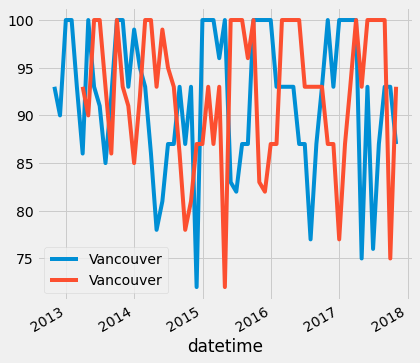

In [19]:
plt.figure(figsize=(6,6))
humidity['Vancouver'].asfreq('M').plot(legend=True)
shifted = humidity['Vancouver'].asfreq('M').shift(5).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.legend(loc=3)
plt.show()

## Resampling

- **Upsampling**: 시계열 데이터를 ``low-freq -> high-freq``으로 변경(eg. Month -> daily)
    * 주로 결측치를 채우거나 통합하려할 때 사용
<br><br>
- **Downsampling**: 시계열 데이터를 ``high-freq -> low-freq``으로 변경(eg. daily -> Month)
    * high-freq일 때의 데이터를 집계할 때 사용

In [20]:
pressure = pd.read_csv('pressure.csv',
                      index_col='datetime',
                      parse_dates=['datetime'])
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,1031.0,NaN,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,...,1021.0,NaN,1021.0,1017.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,1030.0,NaN,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,...,1021.0,NaN,1023.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,1030.0,NaN,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,NaN,1024.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,1029.0,NaN,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,NaN,1026.0,1022.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,1029.0,NaN,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,NaN,1027.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,1021.0,1031.0,1013.0,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,...,1021.0,1020.0,1021.0,1017.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 21:00:00,1021.0,1030.0,1013.0,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,...,1021.0,1020.0,1023.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 22:00:00,1021.0,1030.0,1013.0,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,1020.0,1024.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 23:00:00,1021.0,1029.0,1013.0,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,1020.0,1026.0,1022.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-30 00:00:00,1021.0,1029.0,1013.0,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,1020.0,1027.0,1023.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0


In [22]:
pressure = pressure.fillna(method='backfill')

In [23]:
pressure.shape

(45252, 36)


- **Upsampling** : ``resample('frequency').function()`` 사용
    * eg. resample('3M').max() : 3달 주기로 끊었을 때 가장 최댓값을 부여
    
- **Downsampling** : ``resample('frequency').pad()`` 사용
    * 이때, pad는 fillna의 pad와 동일 즉, ``위에서 Upsampling한 값을 low-frequency된 빈 공간에 다 넣음!``

In [24]:
pressure = pressure.resample('3D').mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.000000,1013.000000,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,...,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,...,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,...,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [25]:
pressure = pressure.resample('D').pad()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-02,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-03,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333
2012-10-05,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333


In [26]:
pressure.shape

(1885, 36)

# Finance and statistics
## Percent change

- ``pandas.dataframe.div(나눌값, fill_value=결측치채울값)`` 사용
    * 현재 예시에서는 **df[column].div(df[column]을한칸 이동시킨값)**

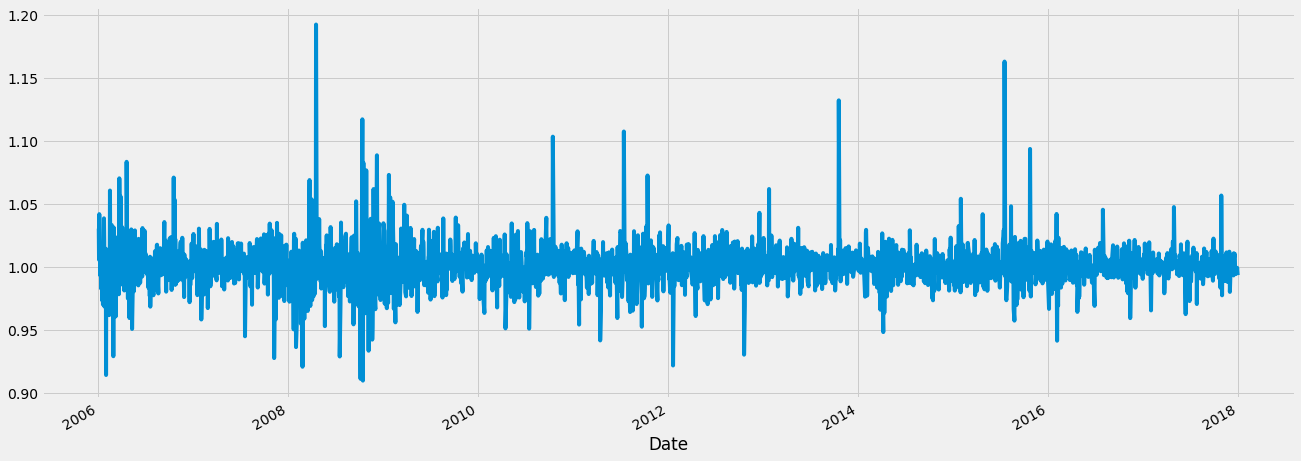

In [27]:
google['Change'] = google['High'].div(google['High'].shift())
google['Change'].plot(figsize=(20,8))
plt.show()

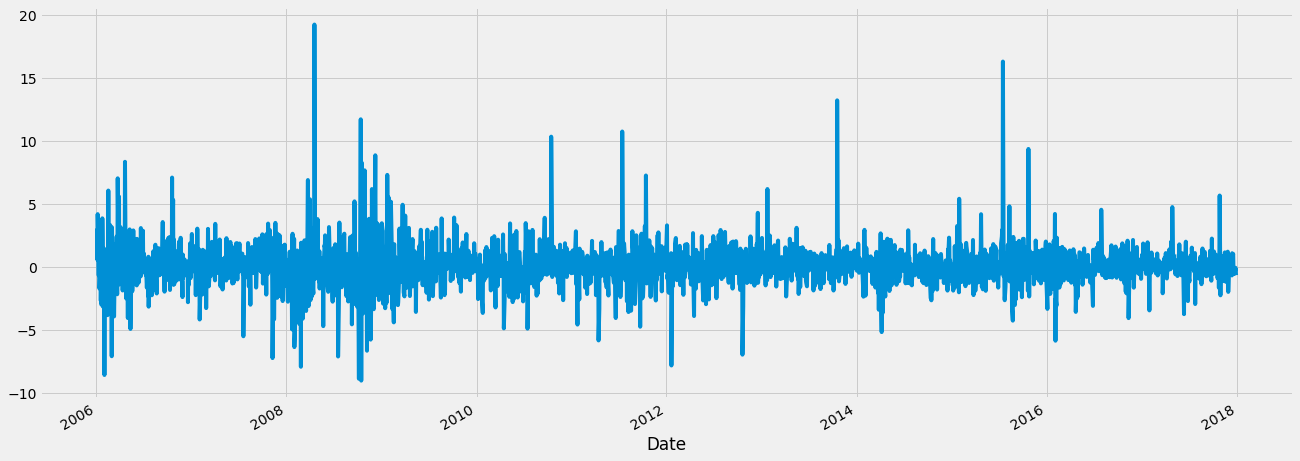

In [28]:
# 퍼센트에서 1을 빼고 100을 곱해 퍼센테이지로 만들자
google['Return'] = google['Change'].sub(1).mul(100)
google['Return'].plot(figsize=(20,8))
plt.show()

- 아니면 한번에 ``pct_change()함수 사용해서 0~1사이 값으로 만들자!`` 그리고 100을 곱하면 몇%로 나옴!

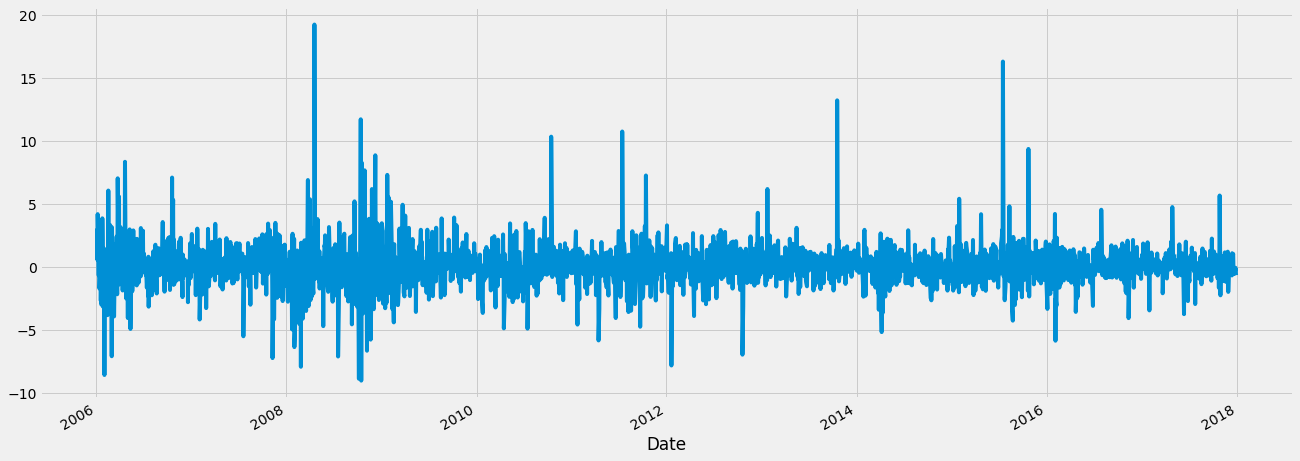

In [29]:
google['High'].pct_change().mul(100).plot(figsize=(20,8))
plt.show()

## 앞뒤 데이터간의 차이값을 구해서 변화값 보기

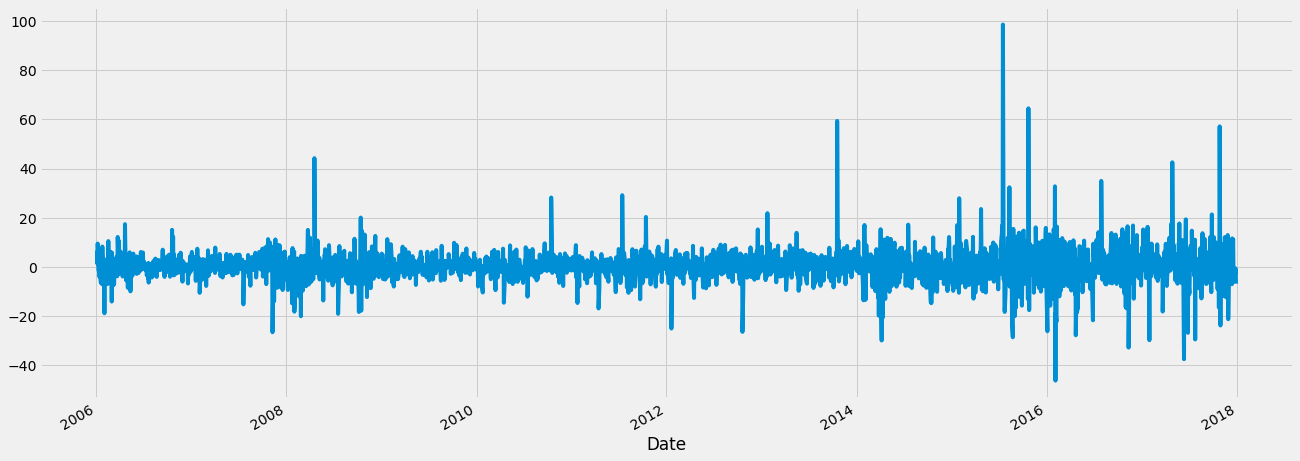

In [30]:
google['High'].diff().plot(figsize=(20,8))
plt.show()

## 2개 이상의 시계열 데이터 비교

- 2개 이상의 시계열 데이터를 normalize(표준화) 시켜주어야 함!
- 표준화시켜 주기 위해서 ``각 시계열 데이터의 첫 번째 데이터를 각 시계열 데이터 모두에 나누어준다!``
- 이렇게 해서 두 시계열은 같은 지점에서 시작하고 비교될 수 있다!

In [31]:
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv',
                       index_col='Date',
                       parse_dates=['Date'])

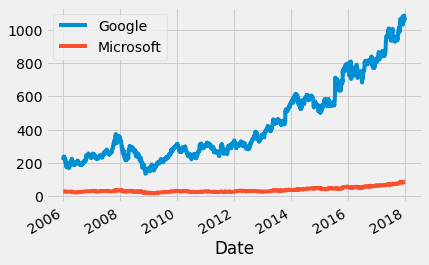

In [32]:
# 표준화 하기 전 두 시계열 데이터의 비교
google['High'].plot()
microsoft['High'].plot()
plt.legend(['Google','Microsoft'])
plt.show()

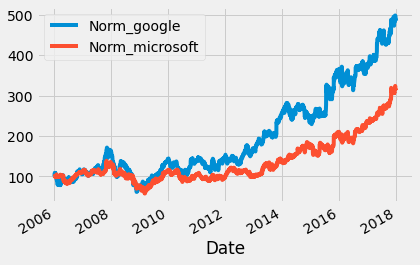

In [33]:
# 두 시계열 데이터 각각 표준화시켜주어서 비교
norm_google = google['High'].div(google['High'].iloc[0]).mul(100)
norm_microsoft = microsoft['High'].div(microsoft['High'].iloc[0]).mul(100)

norm_google.plot()
norm_microsoft.plot()
plt.legend(['Norm_google', 'Norm_microsoft'])
plt.show()

## Window function(이동평균 함수)

- Rolling : 다음 데이터를 예측하기 위해 직전의 ``지정한 날``만큼의 과거 데이터만 참고
- Expanding : 다음 데이터를 예측하기 위해 직전의 ``모든 날``의 과거 데이터를 참고

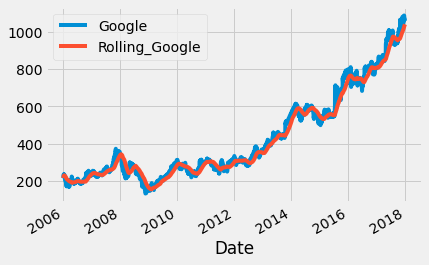

In [34]:
# 과거 90일만의 평균값을 이동평균 시키자!
rolling_google = google['High'].rolling('90D').mean()
google['High'].plot()
rolling_google.plot()
plt.legend(['Google','Rolling_Google'])
plt.show()

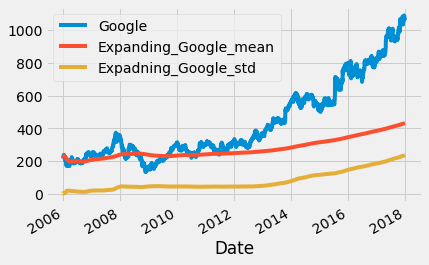

In [35]:
# 과거 모든 데이터의 평균값 또는 표준편차값 만큼 이동평균 시키자
expanding_google = google['High'].expanding().mean()
expanding_google2 = google['High'].expanding().std()
google['High'].plot()
expanding_google.plot()
expanding_google2.plot()
plt.legend(['Google','Expanding_Google_mean','Expadning_Google_std'])
plt.show()

## Autocorrelation and Partial Autocorrelation

- **자기상관(ACF)**
    * 그 시계열 데이터가 lag(shift)됬을 때 그 시계열 자신과 얼마나 상관이 있는지 보는 함수<br><br>
    
- **편자기상관(PACF)**
    * 현재 시점으로부터 과거의 lag 데이터와 현재 데이터의 회귀분석
    * 일반 선형회귀랑 비슷하게 해석됨. 즉, 다른 상수값들은 고정시킨 상태에서 특정 과거 lag데이터가 변할 때 현제 데이터가 얼마나 변하는지를 의미!

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

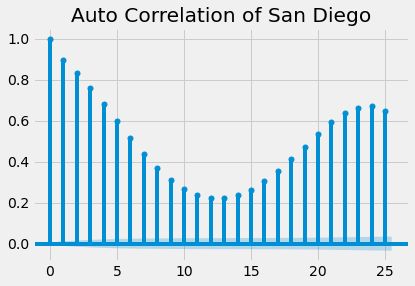

In [37]:
# 자기상관 분석 - 몇 lag(shift)까지 살펴볼 것인지
plot_acf(humidity['San Diego'], lags=25,
        title='Auto Correlation of San Diego')
plt.show()

- 모든 구간이 신뢰수준(파란색깔)을 넘기 때문에 자기상관이 통계적으로 유의하다
- 따라서, 해당 시계열은 ``비 정상성``이다! 그래서 차분을 이용하거나 해서 정상성으로 만들어주어야 함!!

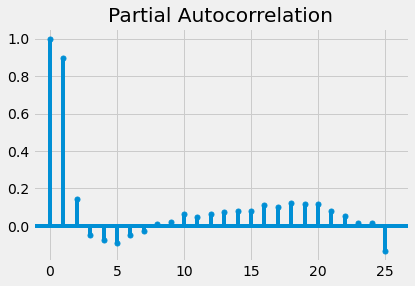

In [38]:
# 편자기상관 분석 - 과거의 몇 lag까지 살펴볼 것인지 설정
plot_pacf(humidity['San Diego'], lags=25)
plt.show()

- 신뢰수준보다 높긴 하지만 2lag 이후 부터는 편자기상관이 매우 낮은 편!

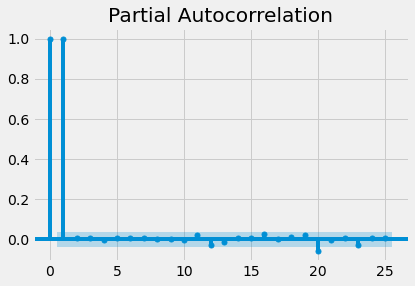

In [39]:
# Microsoft 편자기상관 분석해보기
plot_pacf(microsoft['Close'], lags=25)
plt.show()

- 1번째 lag가 매우 통계적으로 유의함. 20번째 lag는 유의수준을 넘긴 했지만 약간만을 넘은 상태임..(유도리있게 넘어가기)

- 따라서 해당 데이터 1번 차분을 이용해 정상성으로 만들어주면 될듯!

## 시계열 분해, Random Walks

### 추세, 계절성, noise 데이터

- 추세: 시계열 기간 동안 지속적인 상승 또는 하락하는 경향을 보일 때
<br><br>
- 계절성: 마치 sin함수처럼 시계열에 주기적(반복적)인 패턴을 보일 때
<br><br>
- noise: 이상치 또는 결측치

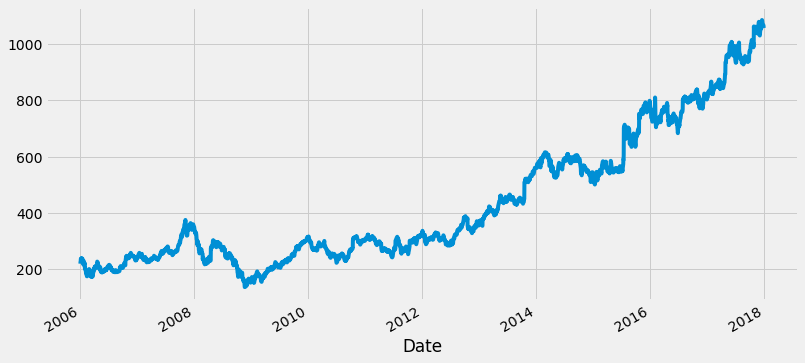

In [41]:
google['High'].plot(figsize=(12,6))
plt.show()

- 추세도 있고 계절성도 있는 듯하다..

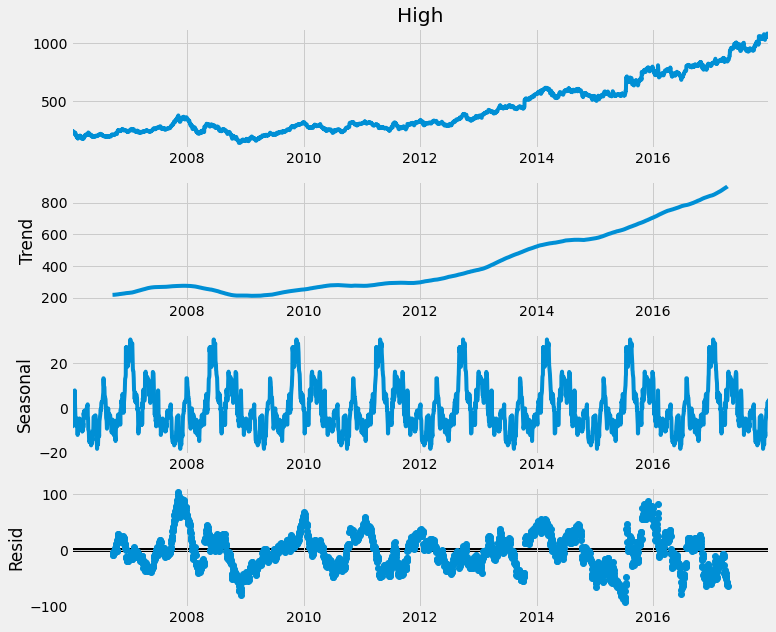

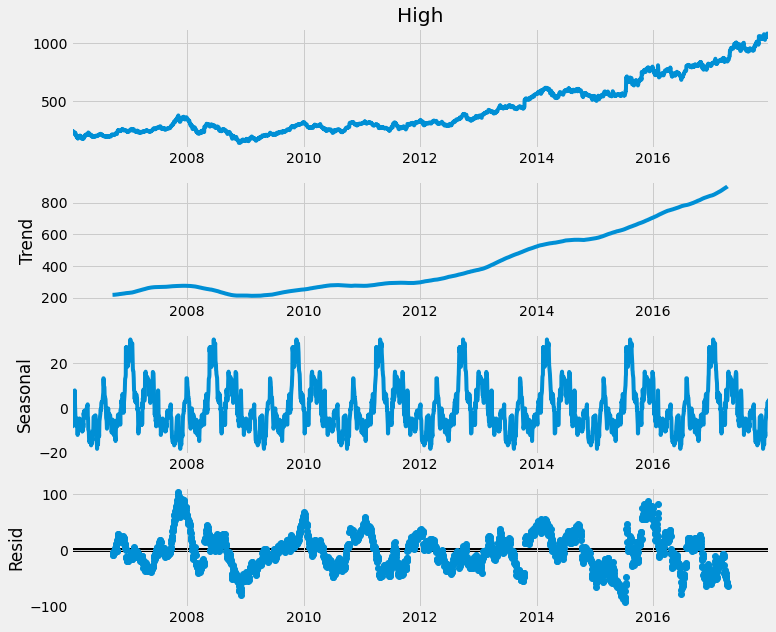

In [52]:
# 계절성 시계열 분해하기
import statsmodels as sm
from statsmodels.tsa import seasonal

plt.rcParams['figure.figsize'] = 11, 9
decomposed_google = seasonal.seasonal_decompose(google['High'],
                                             freq=360)
decomposed_google.plot()

- 분해를 하는 목적은 ``변동요인을 잘 구분하기 위함``임!

- 분해결과,
    * 상승하는 추세를 띔
    * 일정한 계절적 주기를 띔
    * Resid로 보아 이상치나 결측치들이 있는 일정하지 않은 노이즈 데이터 존재

### White noise

- 화이트 노이즈 데이터는 기본적으로 완전 랜덤한 값이기 떄문에 ``항상 정상성 만족``
- ``일정한 평균과 분산``을 갖고 있음
- ``모든 lag 데이터에 대해 자기상관이 0``이다 즉, 독립

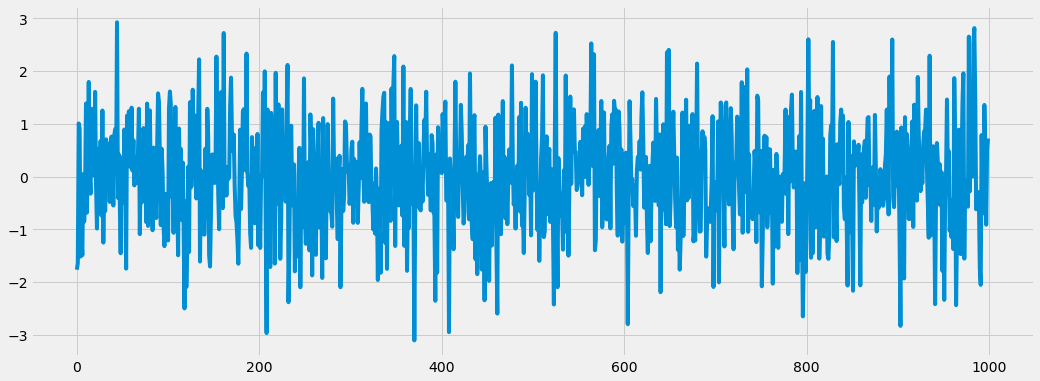

In [53]:
# np.random.normal (정규분포 데이터)로 white noise 데이터 만들기
plt.rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
plt.plot(white_noise)
plt.show()

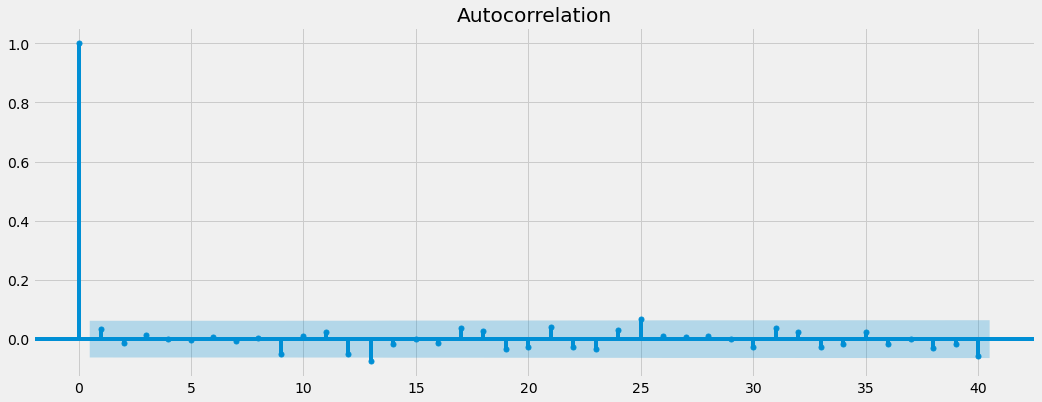

In [54]:
# white noise의 ACF 그래프 살펴보기
plot_acf(white_noise, lags=40)
plt.show()

- 모든 lag값에 대해 신뢰수준을 넘지 않기 때문에 자기상관 없음!

### Random walk(Stochastic함!)

- 전시점 데이터 + epsilon(white noise)
- 기본적으로 비정상성을 갖음
- noise를 끼고 있기 떄문에 잘 예측될 수가 없음
<br><br>
- **``(Augmented) Dickey-Fuller Test(ADF)``**
    * 특정 데이터가 Random walk 데이터인지 아닌지 통계적 검정 방법
    * 귀무가설 : 이 데이터는 Random walk이다!
    * 대립가설 : 이 데이터는 Random walk가 **아니**다!

### Stationarity(정상성)

- 정상성 : 모든 시간에 대해 평균, 분산, 자기상관 등이 모두 일정한 특성
- 비정상성 데이터는 시계열을 모델링할 때 많은 파라미터를 설명하지 못하게 되며 시간에 의존성이 있는 특성이다. 따라서 ``차분(diff())``을 이용해 정상화시켜주어야 함!

<AxesSubplot:xlabel='Date'>

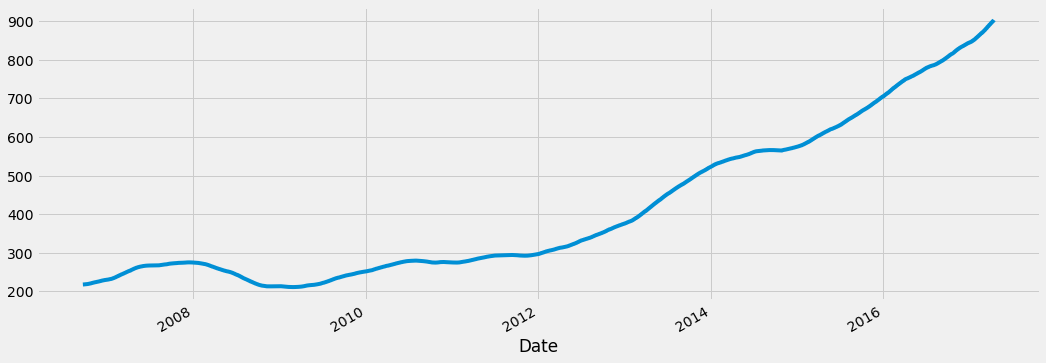

In [55]:
# google의 trend 데이터를 정상화 시켜보기
decomposed_google.trend.plot()

<AxesSubplot:xlabel='Date'>

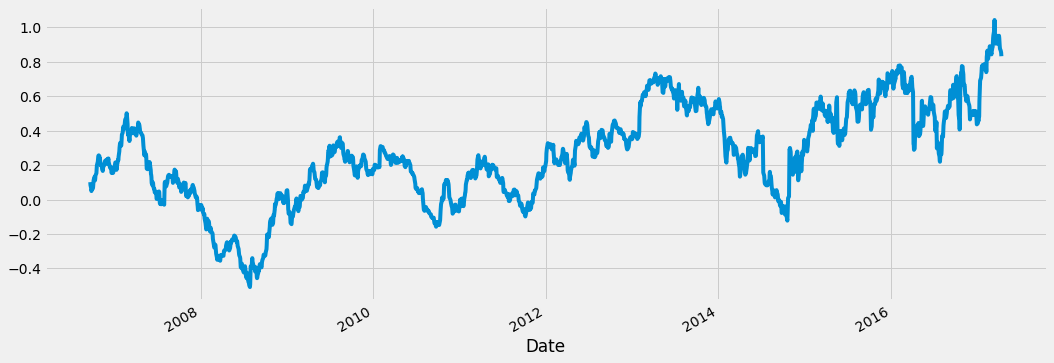

In [56]:
decomposed_google.trend.diff().plot()

# Modeling using statstools
## AR model

- 랜덤한 프로세스 유형을 나타내는 대표적인 유형
- 그래서 자연, 경제 분야에서 시간에 따라 변하는 프로세스를 설명하기 위해 자주 사용
- AR모델은 ``그것의 이전 데이터에 선형적으로 의존``하고 예측력이 불완전(stochastic함)

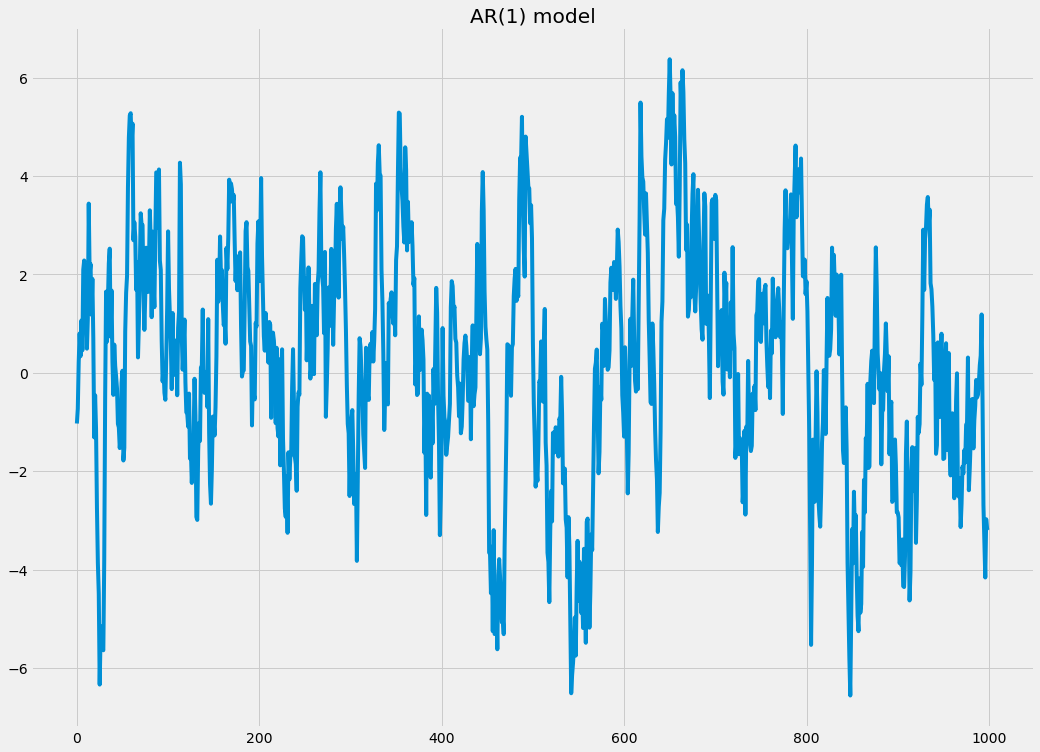

In [57]:
from statsmodels.tsa.arima_process import ArmaProcess

plt.rcParams['figure.figsize'] = 16 ,12
ar1 = np.array([1, -0.9]) # -0.9는 회귀계수
ma1 = np.array([1])
# AR 회귀식 만들기
AR1 = ArmaProcess(ar1, ma1)
# AR 데이터 하나 생성
sim1 = AR1.generate_sample(nsample=1000)
plt.title("AR(1) model")
plt.plot(sim1)

### AR 모델로 미래값 예측하기

In [58]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

# AR 모델 구축 - order=(AR차수, MA차수)
model = ARMA(sim1, order=(1,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1432.513
Method:                       css-mle   S.D. of innovations              1.013
Date:                Mon, 16 Nov 2020   AIC                           2871.025
Time:                        16:02:47   BIC                           2885.749
Sample:                             0   HQIC                          2876.621
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1705      0.334      0.510      0.610      -0.485       0.826
ar.L1.y        0.9051      0.013     67.501      0.000       0.879       0.931
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1049           +0.0000j            1.1049            0.0000
-----------------------------------------------------------------------------
"""

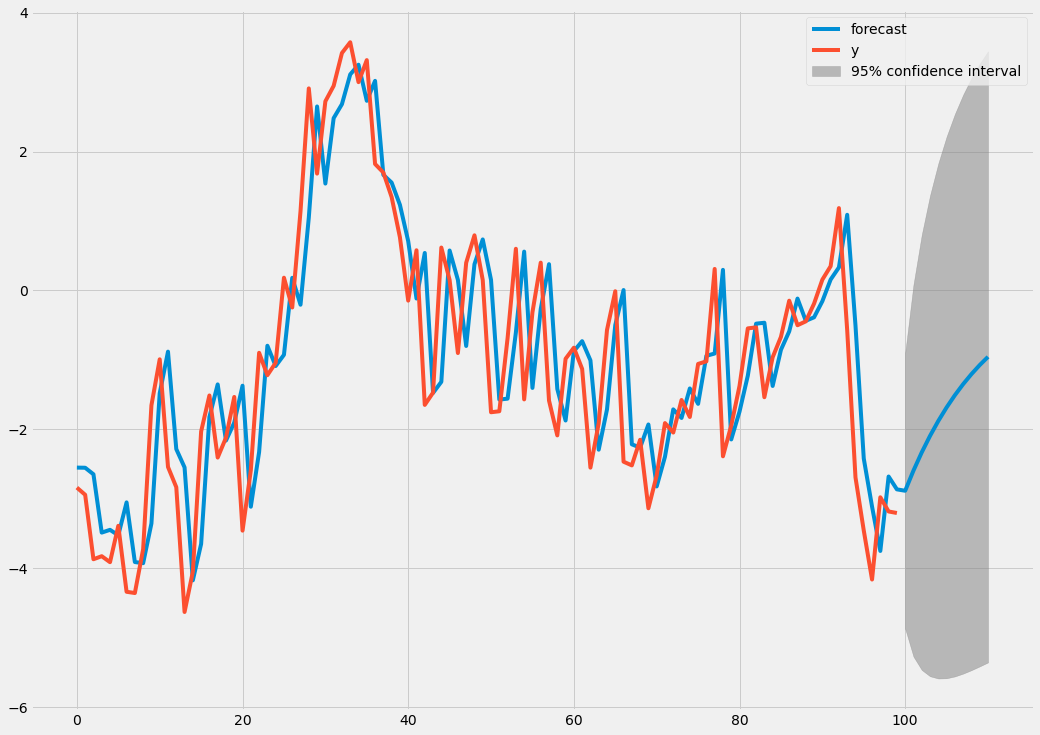

In [68]:
# 구축한 AR모델로 미래값 예측하는 그래프 그리기
result.plot_predict(start=900, end=1010)
plt.show()

In [72]:
# 적합된 값과 실제값 RMSE 살펴보기
from sklearn.metrics import mean_squared_error

# predict 할때 start, end 사이 값은 -1계산 안해줘도 됨!
rmse = math.sqrt(mean_squared_error(sim1[800:900],
                                   result.predict(start=800, end=899)))
print(F"RMSE: {rmse:.4f}")

RMSE: 1.0738


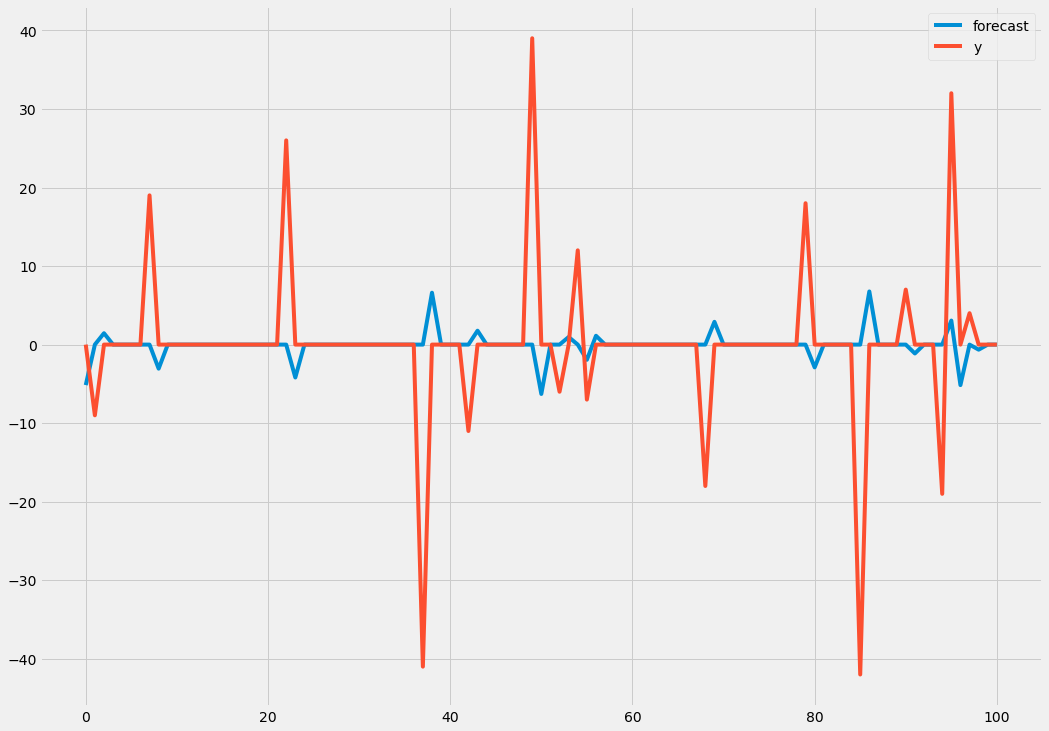

In [75]:
humd = ARMA(humidity['Montreal'].diff().iloc[1:].values,
            order=(1,0))
res = humd.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [78]:
rmse = math.sqrt(mean_squared_error(humidity['Montreal'].diff().iloc[900:1000].values,
                                   res.predict(start=900, end=999)))
rmse

8.029137496906042

- MA, ARMA, ARIMA 모델도 동일하게 수행하면 됨!

## VAR Models

- 다양한 시계열 데이터들 사이의 선형 독립성을 포착하기 위해 사용되는 stochastic(확률적) 모델
- 일변량 AR 모델의 일반화 버전
- 일반적으로 독립변수 -> 종속변수 영향만 생각했지만, 반대의 경우 ``종속변수->독립변수``영향도 고려한 모델
- VAR모델로 예측하기 위해선 해당 시계열 데이털르 정상성 있는 상태로 해주어야 함!
- VAR모델은 모든 시점에 대해 반복적으로 예측값을 얻음

In [88]:
# diff() 차분으로 정상화 시켜주기
from statsmodels.tsa.statespace import varmax

train_sample = pd.concat([google['Close'].diff().iloc[1:],
                         microsoft['Close'].diff().iloc[1:]],
                        axis=1)
model = varmax.VARMAX(train_sample, order=(2,1), trend='c')
result = model.fit(maxiter=1000, disp=False)
result.summary()

/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Dep. Variable:,"['Close', 'Close']",No. Observations:,3018
Model:,"VARMA(2,1)",Log Likelihood,-12185.132
,+ intercept,AIC,24404.264
Date:,"Mon, 16 Nov 2020",BIC,24506.474
Time:,17:53:59,HQIC,24441.018
Sample:,0,,
,- 3018,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.00, 0.00",Jarque-Bera (JB):,"48220.18, 14928.77"
Prob(Q):,"1.00, 0.96",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"3.32, 1.62",Skew:,"1.15, -0.03"
